# Homework 1:COVID-19 Cases Prediction(Regression)


Objective:
* Solve a **regression** problem with **deep neural networks** (DNN).
* Understand basic DNN training tips.
* Get familiar with **PyTorch**.

Learn [more](../slides/hw01.pdf).

## Data Exploration

### Data Visualization
There may be a linear relationship between the characteristics of different days.

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tr_path = '../datasets/covid.train.csv'
tt_path = '../datasets/covid.test.csv'

def read_file(path):
    return pd.read_csv(path)

tr_data = read_file(tr_path)
tt_data = read_file(tt_path)

def visual_data(data):
    fig,axs = plt.subplots(18, 3, figsize = (20, 120))
    sns.regplot(x="tested_positive", y="tested_positive.1", data=data, ax=axs[0][0])
    sns.regplot(x="tested_positive", y="tested_positive.2",data=data, ax=axs[0][1])
    sns.regplot(x="tested_positive.1", y="tested_positive.2", data=data, ax=axs[0][2])
    sns.regplot(x="cli", y="cli.1", data=data, ax=axs[1][0])
    sns.regplot(x="cli", y="cli.2", data=data, ax=axs[1][1])
    sns.regplot(x="cli.1", y="cli.2", data=data, ax=axs[1][2])
    sns.regplot(x="ili", y="ili.1", data=data, ax=axs[2][0])
    sns.regplot(x="ili", y="ili.2", data=data, ax=axs[2][1])
    sns.regplot(x="ili.1", y="ili.2", data=data, ax=axs[2][2])
    sns.regplot(x="hh_cmnty_cli", y="hh_cmnty_cli.1", data=data, ax=axs[3][0])
    sns.regplot(x="hh_cmnty_cli", y="hh_cmnty_cli.2", data=data, ax=axs[3][1])
    sns.regplot(x="hh_cmnty_cli.1", y="hh_cmnty_cli.2", data=data, ax=axs[3][2])
    sns.regplot(x="nohh_cmnty_cli", y="nohh_cmnty_cli.1", data=data, ax=axs[4][0])
    sns.regplot(x="nohh_cmnty_cli", y="nohh_cmnty_cli.2", data=data, ax=axs[4][1])
    sns.regplot(x="nohh_cmnty_cli.1", y="nohh_cmnty_cli.2", data=data, ax=axs[4][2])
    sns.regplot(x="wearing_mask", y="wearing_mask.1", data=data, ax=axs[5][0])
    sns.regplot(x="wearing_mask", y="wearing_mask.2", data=data, ax=axs[5][1])
    sns.regplot(x="wearing_mask.1", y="wearing_mask.2", data=data, ax=axs[5][2])
    sns.regplot(x="travel_outside_state", y="travel_outside_state.1", data=data, ax=axs[6][0])
    sns.regplot(x="travel_outside_state", y="travel_outside_state.2", data=data, ax=axs[6][1])
    sns.regplot(x="travel_outside_state.1", y="travel_outside_state.2", data=data, ax=axs[6][2])
    sns.regplot(x="work_outside_home", y="work_outside_home.1", data=data, ax=axs[7][0])
    sns.regplot(x="work_outside_home", y="work_outside_home.2", data=data, ax=axs[7][1])
    sns.regplot(x="work_outside_home.1", y="work_outside_home.2", data=data, ax=axs[7][2])
    sns.regplot(x="shop", y="shop.1", data=data, ax=axs[8][0])
    sns.regplot(x="shop", y="shop.2", data=data, ax=axs[8][1])
    sns.regplot(x="shop.1", y="shop.2", data=data, ax=axs[8][2])
    sns.regplot(x="restaurant", y="restaurant.1", data=data, ax=axs[9][0])
    sns.regplot(x="restaurant", y="restaurant.2",data=data, ax=axs[9][1])
    sns.regplot(x="restaurant.1", y="restaurant.2", data=data, ax=axs[9][2])
    sns.regplot(x="spent_time", y="spent_time.1", data=data, ax=axs[10][0])
    sns.regplot(x="spent_time", y="spent_time.2", data=data, ax=axs[10][1])
    sns.regplot(x="spent_time.1", y="spent_time.2", data=data, ax=axs[10][2])
    sns.regplot(x="large_event", y="large_event.1", data=data, ax=axs[11][0])
    sns.regplot(x="large_event", y="large_event.2", data=data, ax=axs[11][1])
    sns.regplot(x="large_event.1", y="large_event.2", data=data, ax=axs[11][2])
    sns.regplot(x="public_transit", y="public_transit.1", data=data, ax=axs[12][0])
    sns.regplot(x="public_transit", y="public_transit.2", data=data, ax=axs[12][1])
    sns.regplot(x="public_transit.1", y="public_transit.2", data=data, ax=axs[12][2])
    sns.regplot(x="anxious", y="anxious.1", data=data, ax=axs[13][0])
    sns.regplot(x="anxious", y="anxious.2", data=data, ax=axs[13][1])
    sns.regplot(x="anxious.1", y="anxious.2", data=data, ax=axs[13][2])
    sns.regplot(x="depressed", y="depressed.1", data=data, ax=axs[14][0])
    sns.regplot(x="depressed", y="depressed.2", data=data, ax=axs[14][1])
    sns.regplot(x="depressed.1", y="depressed.2", data=data, ax=axs[14][2])
    sns.regplot(x="felt_isolated", y="felt_isolated.1", data=data, ax=axs[15][0])
    sns.regplot(x="felt_isolated", y="felt_isolated.2", data=data, ax=axs[15][1])
    sns.regplot(x="felt_isolated.1", y="felt_isolated.2", data=data, ax=axs[15][2])
    sns.regplot(x="worried_become_ill", y="worried_become_ill.1", data=data, ax=axs[16][0])
    sns.regplot(x="worried_become_ill", y="worried_become_ill.2", data=data, ax=axs[16][1])
    sns.regplot(x="worried_become_ill.1", y="worried_become_ill.2", data=data, ax=axs[16][2])
    sns.regplot(x="worried_finances", y="worried_finances.1", data=data, ax=axs[17][0])
    sns.regplot(x="worried_finances", y="worried_finances.2", data=data, ax=axs[17][1])
    sns.regplot(x="worried_finances.1", y="worried_finances.2", data=data, ax=axs[17][2])

# visual_data(tr_path)

## Data Preprocessing

## Feature Engineering

### Feature Selection

Selecte features by sklearn

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

x = tr_data.iloc[:, list(range(93))]
x = (x - x.min()) / (x.max() - x.min())
y = tr_data.iloc[:, -1]

def test_f_regression():
    fs = SelectKBest(score_func=f_regression, k='all')
    fit = fs.fit(x,y)
    df = pd.DataFrame([x.columns, fit.scores_], index=['feature', 'score'])
    trans_df = pd.DataFrame(df.values.T, index=df.columns, columns=df.index)
    trans_df['score'] = trans_df['score'].astype(float)
    return trans_df
	
print(test_f_regression().nlargest(20,'score')) 


               feature          score
76   tested_positive.1  148069.658278
58     tested_positive   69603.872591
43        hh_cmnty_cli    9235.492094
61      hh_cmnty_cli.1    9209.019558
79      hh_cmnty_cli.2    9097.375172
44      nohh_cmnty_cli    8395.421300
62    nohh_cmnty_cli.1    8343.255927
80    nohh_cmnty_cli.2    8208.176435
41                 cli    6388.906849
59               cli.1    6374.548000
77               cli.2    6250.008702
42                 ili    5998.922880
60               ili.1    5937.588576
78               ili.2    5796.947672
75  worried_finances.1     811.916460
57    worried_finances     788.076931
88    public_transit.2     686.736539
70    public_transit.1     681.562902
52      public_transit     678.834789
84              shop.2     561.764051


Test in the following method:
* select one feature in the features with linear relationship
* select full features
* only select tested_positives as features
* select states and tested_positives as features
* select features with a high score(preform best)

In [68]:
''' select one feature in the features with linear relationship '''
# features = list(range(42)) + list(range(46,48)) + [49] + list(range(51,55)) + list(range(57,60))  + list(range(64,66)) + [67] + list(range(69,73)) + list(range(75, 93))
''' select full features '''
# features = list(range(93))
''' only select tested_positives as features '''
# features = [57] + [75]
''' select states and tested_positives as features '''
# features = list(range(40)) + [57] + [75]
''' select features with a high score '''
features = list(range(40,44)) + list(range(57,62)) + list(range(75,80))

## Model Selection

### Define the Dataset

In [69]:
import pandas as pd
import torch
from torch.utils.data import Dataset

class COVID19Dataset(Dataset):
    def __init__(self, mode='train'):
        self.mode = mode

        if mode == 'test':
            data = tt_data.iloc[:, features]
            self.data = torch.FloatTensor(data.values)
        else:
            target = tr_data.iloc[:, -1]
            data = tr_data.iloc[:, features]

            if mode == 'train':
                indices = [i for i in range(len(data)) if i % 10 != 0]
            elif mode == 'dev':
                indices = [i for i in range(len(data)) if i % 10 == 0]

            self.data = torch.FloatTensor(data.iloc[indices].values)
            self.target = torch.FloatTensor(target.iloc[indices].values)

        # Normalize features
        self.data[:, 40:] = \
            (self.data[:, 40:] - self.data[:, 40:].mean(dim=0, keepdim=True)) \
            / self.data[:, 40:].std(dim=0, keepdim=True)

        self.dim = self.data.shape[1]

        print('Finished reading the {} set of COVID19 Dataset ({} samples found, each dim = {})'
              .format(mode, len(self.data), self.dim))

    def __getitem__(self, index):
        if self.mode in ['train', 'dev']:
            return self.data[index], self.target[index]
        else:
            return self.data[index]

    def __len__(self):
        return len(self.data)

In [70]:
from torch.utils.data import DataLoader

def trans_dataloader(mode, batch_size):
    return DataLoader(COVID19Dataset(mode), batch_size, shuffle=(mode=='train'))

### Define the Model

In [71]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        return self.net(x).squeeze(1)

    def cal_loss(self, pred, target):
        return torch.sqrt(self.criterion(pred, target))

In [72]:
def create_optim(optim_fun, model_params, args):
    return getattr(torch.optim, optim_fun)(model_params, **args)

### Train, Develop and Test

In [73]:
def train(tr_set, dv_set, model, config, device):
    n_epochs = config['n_epochs']
    optimizer = create_optim(config['optim'], model.parameters(), config['optim_args'])

    min_mse = 1000.
    mse_model = None
    loss_record = {'train': [], 'dev': []}
    early_stop_cnt = 0
    epoch = 0
    while epoch < n_epochs:
        model.train()
        for x, y in tr_set:
            optimizer.zero_grad()
            x, y = x.to(device), y.to(device)
            pred = model(x)
            rmse_loss = model.cal_loss(pred, y)
            rmse_loss.backward()
            optimizer.step()
            loss_record['train'].append(rmse_loss.detach().cpu().item())

        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            min_mse = dev_mse
            print('epoch = {:4d}, loss = {:.4f}'
                .format(epoch + 1, min_mse))
            mse_model = model
            early_stop_cnt = 0
        else:
            early_stop_cnt += 1

        epoch += 1
        loss_record['dev'].append(dev_mse)
        if early_stop_cnt > config['early_stop']:
            break

    print('Finished training after {} epochs'.format(epoch))
    return min_mse, loss_record, mse_model

In [74]:
def dev(dv_set, model, device):
    model.eval()
    total_loss = 0
    for x, y in dv_set:
        x, y = x.to(device), y.to(device)
        with torch.no_grad():
            pred = model(x)
            rmse_loss = model.cal_loss(pred, y)
        total_loss += rmse_loss.detach().cpu().item() * len(x)
    total_loss = total_loss / len(dv_set.dataset)
    return total_loss

In [75]:
def test(tt_set, model, device):
    model.eval()
    preds = []
    for x in tt_set:
        x = x.to(device)
        with torch.no_grad():
            pred = model(x)
            preds += list(pred.detach().cpu())
    # index = [list(range(len(preds)))]
    pred_df = pd.DataFrame(preds, columns=['tested_positive']).astype("float").reset_index()
    pred_df.rename(columns={'index':'id'}, inplace = True)
    return pred_df

### Loss Visualization

In [76]:
import matplotlib.pyplot as plt

def plot_learning_curve(loss_record, title=''):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]
    plt.figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
    plt.ylim(0.0, 5.)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()


def plot_pred(dv_set, model, device, lim=35., preds=None, targets=None):
    ''' Plot prediction of your DNN '''
    if preds is None or targets is None:
        model.eval()
        preds, targets = [], []
        for x, y in dv_set:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():
                pred = model(x)
                preds.append(pred.detach().cpu())
                targets.append(y.detach().cpu())
        preds = torch.cat(preds, dim=0).numpy()
        targets = torch.cat(targets, dim=0).numpy()

    plt.figure(figsize=(5, 5))
    plt.scatter(targets, preds, c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='b')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()

### Train

Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 14)
Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 14)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 14)
epoch =    1, loss = 4.0383
epoch =    2, loss = 1.7334
epoch =    3, loss = 1.1344
epoch =    4, loss = 1.0990
epoch =    5, loss = 1.0821
epoch =    7, loss = 1.0808
epoch =    8, loss = 1.0549
epoch =   13, loss = 1.0174
epoch =   15, loss = 1.0101
epoch =   18, loss = 0.9931
epoch =   20, loss = 0.9892
epoch =   22, loss = 0.9729
epoch =   24, loss = 0.9656
epoch =   26, loss = 0.9652
epoch =   27, loss = 0.9647
epoch =   29, loss = 0.9514
epoch =   31, loss = 0.9427
epoch =   34, loss = 0.9331
epoch =   37, loss = 0.9198
epoch =   39, loss = 0.9161
epoch =   45, loss = 0.9062
epoch =   48, loss = 0.9034
epoch =   52, loss = 0.8970
epoch =   56, loss = 0.8948
epoch =   61, loss = 0.8854
epoch =   75, loss = 0.8785
epoch =   82, loss 

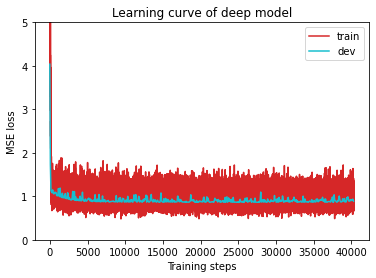

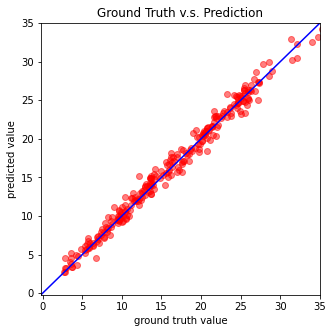

In [78]:
import os
import numpy as np

def get_device():
    ''' Get device (if GPU is available, use GPU) '''
    return 'cuda' if torch.cuda.is_available() else 'cpu'

device = get_device()
os.makedirs('../models', exist_ok=True)

myseed = 42069
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)


config = {
    'n_epochs': 3000,                  # maximum number of epochs
    'batch_size': 32,                 # mini-batch size for dataloader
    'optim': 'Adam',                    # optimization algorithm (optimizer in torch.optim)
    'optim_args': {                    # hyper-parameters for the optimizer (depends on which optimizer you are using)
        'lr': 0.001,
        # 'momentum': 0.9,
        'weight_decay': 1e-5
    },
    'early_stop': 200,                  # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': '../models/model.pth'  # your model will be saved here
}

tt_set = trans_dataloader('test', config['batch_size'])

tr_set = trans_dataloader('train', config['batch_size'])
dv_set = trans_dataloader('dev', config['batch_size'])

model = NeuralNet(tr_set.dataset.dim).to(device)

model_loss, model_loss_record, mse_model = train(tr_set, dv_set, model, config, device)

        
torch.save(mse_model.state_dict(), config['save_path'])
print('Best model has been saved, min_loss = {:.4f}.'.format(model_loss))

plot_learning_curve(model_loss_record, title='deep model')
plot_pred(dv_set, model, device)  # Show prediction on the validation set

### Prediction

In [ ]:
def save_pred(preds, w_path):
    ''' Save predictions to specified file '''
    preds.to_csv(w_path, index=False)

preds = test(tt_set, model, device)              # predict COVID-19 cases with your model
save_pred(preds, '../datasets/pred.csv')         # save prediction file to pred.csv

## Ensemble Generation

## Scores

Public score: 0.90009

Private score: 0.89449